In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import joblib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


sns.set()

In [ ]:
# load datasets

train_df = pd.read_csv('/content/drive/MyDrive/Thesis/TEP_FaultFree_Training.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/TEP_Faulty_Training.csv')

In [ ]:
# remove the first 'unnamed' column

train_df = train_df.iloc[:,1:]
test_df = test_df.iloc[:,1:]

In [ ]:
# @title
# rename stuff according to this paper: https://www.sciencedirect.com/science/article/pii/S0098135414000969?via%3Dihub
'''
X_dict = {
'XMEAS_1':'A_feed_stream',
'XMEAS_2':'D_feed_stream',
'XMEAS_3':'E_feed_stream',
'XMEAS_4':'Total_fresh_feed_stripper',
'XMEAS_5':'Recycle_flow_into_rxtr',
'XMEAS_6':'Reactor_feed_rate',
'XMEAS_7':'Reactor_pressure',
'XMEAS_8':'Reactor_level',
'XMEAS_9':'Reactor_temp',
'XMEAS_10':'Purge_rate',
'XMEAS_11':'Separator_temp',
'XMEAS_12':'Separator_level',
'XMEAS_13':'Separator_pressure',
'XMEAS_14':'Separator_underflow',
'XMEAS_15':'Stripper_level',
'XMEAS_16':'Stripper_pressure',
'XMEAS_17':'Stripper_underflow',
'XMEAS_18':'Stripper_temperature',
'XMEAS_19':'Stripper_steam_flow',
'XMEAS_20':'Compressor_work',
'XMEAS_21':'Reactor_cooling_water_outlet_temp',
'XMEAS_22':'Condenser_cooling_water_outlet_temp',
'XMEAS_23':'Composition_of_A_rxtr_feed',
'XMEAS_24':'Composition_of_B_rxtr_feed',
'XMEAS_25':'Composition_of_C_rxtr_feed',
'XMEAS_26':'Composition_of_D_rxtr_feed',
'XMEAS_27':'Composition_of_E_rxtr_feed',
'XMEAS_28':'Composition_of_F_rxtr_feed',
'XMEAS_29':'Composition_of_A_purge',
'XMEAS_30':'Composition_of_B_purge',
'XMEAS_31':'Composition_of_C_purge',
'XMEAS_32':'Composition_of_D_purge',
'XMEAS_33':'Composition_of_E_purge',
'XMEAS_34':'Composition_of_F_purge',
'XMEAS_35':'Composition_of_G_purge',
'XMEAS_36':'Composition_of_H_purge',
'XMEAS_37':'Composition_of_D_product',
'XMEAS_38':'Composition_of_E_product',
'XMEAS_39':'Composition_of_F_product',
'XMEAS_40':'Composition_of_G_product',
'XMEAS_41':'Composition_of_H_product',
'XMV_1':'D_feed_flow_valve',
'XMV_2':'E_feed_flow_valve',
'XMV_3':'A_feed_flow_valve',
'XMV_4':'Total_feed_flow_stripper_valve',
'XMV_5':'Compressor_recycle_valve',
'XMV_6':'Purge_valve',
'XMV_7':'Separator_pot_liquid_flow_valve',
'XMV_8':'Stripper_liquid_product_flow_valve',
'XMV_9':'Stripper_steam_valve',
'XMV_10':'Reactor_cooling_water_flow_valve',
'XMV_11':'Condenser_cooling_water_flow_valve',
'XMV_12':'Agitator_speed'
   }

train_df = train_df.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)
test_df = test_df.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)
'''

In [ ]:
X_dict = {
'XMEAS_1':'XMEAS1',
'XMEAS_2':'XMEAS2',
'XMEAS_3':'XMEAS3',
'XMEAS_4':'XMEAS4',
'XMEAS_5':'XMEAS5',
'XMEAS_6':'XMEAS6',
'XMEAS_7':'XMEAS7',
'XMEAS_8':'XMEAS8',
'XMEAS_9':'XMEAS9',
'XMEAS_10':'XMEAS10',
'XMEAS_11':'XMEAS11',
'XMEAS_12':'XMEAS12',
'XMEAS_13':'XMEAS13',
'XMEAS_14':'XMEAS14',
'XMEAS_15':'XMEAS15',
'XMEAS_16':'XMEAS16',
'XMEAS_17':'XMEAS17',
'XMEAS_18':'XMEAS18',
'XMEAS_19':'XMEAS19',
'XMEAS_20':'XMEAS20',
'XMEAS_21':'XMEAS21',
'XMEAS_22':'XMEAS22',
'XMEAS_23':'XMEAS23',
'XMEAS_24':'XMEAS24',
'XMEAS_25':'XMEAS25',
'XMEAS_26':'XMEAS26',
'XMEAS_27':'XMEAS27',
'XMEAS_28':'XMEAS28',
'XMEAS_29':'XMEAS29',
'XMEAS_30':'XMEAS30',
'XMEAS_31':'XMEAS31',
'XMEAS_32':'XMEAS32',
'XMEAS_33':'XMEAS33',
'XMEAS_34':'XMEAS34',
'XMEAS_35':'XMEAS35',
'XMEAS_36':'XMEAS36',
'XMEAS_37':'XMEAS37',
'XMEAS_38':'XMEAS38',
'XMEAS_39':'XMEAS39',
'XMEAS_40':'XMEAS40',
'XMEAS_41':'XMEAS41',
'XMV_1':'XMV1',
'XMV_2':'XMV2',
'XMV_3':'XMV3',
'XMV_4':'XMV4',
'XMV_5':'XMV5',
'XMV_6':'XMV6',
'XMV_7':'XMV7',
'XMV_8':'XMV8',
'XMV_9':'XMV9',
'XMV_10':'XMV10',
'XMV_11':'XMV11',
'XMV_12':'XMV12'
   }

train_df = train_df.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)
test_df = test_df.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)

In [ ]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier

estimators = [
    ('encoder', TargetEncoder()),
    ('clf', XGBClassifier(random_state=8))
]
pipe = Pipeline(steps=estimators)
pipe





Pipeline(steps=[('encoder', TargetEncoder()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=8, ...))])

In [ ]:
# train N models for N features
# every model predicts a single feature
# on a faulty condition, there is a big difference between the target and the prediction
# calculated mean squared error for all predictions

scaler = preprocessing.MinMaxScaler()
features_df = train_df[train_df.faultNumber == 0].iloc[:,3:]
    # select values corresponding to fault type 0 and select from column 4 onwards
features_df = pd.DataFrame(scaler.fit_transform(X=features_df), columns = features_df.columns)
    # scale the dataframe


In [ ]:
features_df

,A_feed_stream,D_feed_stream,E_feed_stream,Total_fresh_feed_stripper,Recycle_flow_into_rxtr,Reactor_feed_rate,Reactor_pressure,Reactor_level,Reactor_temp,Purge_rate,...,E_feed_flow_valve,A_feed_flow_valve,Total_feed_flow_stripper_valve,Compressor_recycle_valve,Purge_valve,Separator_pot_liquid_flow_valve,Stripper_liquid_product_flow_valve,Stripper_steam_valve,Reactor_cooling_water_flow_valve,Condenser_cooling_water_flow_valve
0,0.475064,0.546864,0.553922,0.342491,0.502410,0.541063,0.479042,0.455087,0.588235,0.483488,...,0.409893,0.480777,0.628029,0.500000,0.463959,0.660638,0.554701,0.473079,0.500000,0.516351
1,0.477701,0.497640,0.633506,0.599260,0.412426,0.634461,0.489521,0.483248,0.588235,0.465426,...,0.327865,0.478160,0.314635,0.488903,0.481040,0.508478,0.346304,0.469467,0.518900,0.420388
2,0.475064,0.500674,0.406286,0.620658,0.494912,0.362856,0.507485,0.436177,0.647059,0.460226,...,0.562267,0.481118,0.506964,0.550879,0.485860,0.526080,0.500461,0.471251,0.488960,0.675883
3,0.472799,0.504046,0.505190,0.666887,0.432244,0.359098,0.522455,0.529291,0.470588,0.459314,...,0.460104,0.483355,0.371589,0.529313,0.486781,0.489019,0.543628,0.479521,0.572043,0.488933
4,0.637231,0.563722,0.461649,0.482631,0.502410,0.674181,0.491018,0.563001,0.470588,0.375296,...,0.388516,0.637749,0.453730,0.460218,0.407896,0.645781,0.548959,0.465941,0.546594,0.517424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,0.634260,0.432569,0.392445,0.293488,0.490627,0.528717,0.417665,0.592806,0.588235,0.504652,...,0.331593,0.654887,0.459073,0.373325,0.500532,0.327210,0.616016,0.507073,0.416542,0.540017
249996,0.627168,0.384019,0.488178,0.314622,0.502410,0.481481,0.423653,0.675437,0.470588,0.625433,...,0.431270,0.644498,0.530052,0.418970,0.664328,0.673637,0.723777,0.520044,0.439184,0.586276
249997,0.638457,0.298045,0.407728,0.294545,0.465453,0.565754,0.419162,0.422816,0.588235,0.674330,...,0.514044,0.633161,0.543312,0.363903,0.618045,0.557570,0.504101,0.522612,0.538735,0.585050
249998,0.483642,0.578894,0.431084,0.410118,0.662560,0.731616,0.375749,0.504008,0.470588,0.360427,...,0.337559,0.489573,0.534535,0.344012,0.421362,0.658660,0.342766,0.529097,0.233720,0.521330


In [ ]:
# export for blender

features_df.to_csv('/content/drive/MyDrive/Thesis/BlenderExport/blender_rawscale_fault_00.csv', index=False)

In [ ]:
# define training function

def train(dataframe, cols_to_predict):

    models = {}
        # initialize an empty dictionary to store trained models

    for col in cols_to_predict:
        print('Training model for ', col)
            # what column is being trained?
        model = xgb.XGBClassifier(learning_rate=0.1)#, force_col_wise=True)
        train_x = features_df.drop([col], axis=1)
            # create training features by dropping the current column
            # because the current column is the target variable
        target = features_df[col]

        model.fit(X = train_x, y = target)
            # train the model

        models[col] = model
            # store the model in the dictionary

    return models
        # return the dictionary of trained models

# define prediction function

def predict(models, dataframe, cols_to_predict):

    predictions = []
        # initialize empty list to store predictions
    for col in cols_to_predict:
        test_x = dataframe.drop([col], axis=1)
        test_y = dataframe[col]

        prediction = models[col].predict(test_x)
        predictions.append(prediction)

    return predictions

In [ ]:
features_to_predict = train_df.columns[3:]
dataframe_to_train = train_df[(train_df.faultNumber == 0) & (train_df.simulationRun.isin(range(400)))]

In [ ]:
dataframe_to_train

,faultNumber,simulationRun,sample,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,...,XMV2,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11
0,0,1,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0,1,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0,1,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0,1,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0,1,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199495,0,399,496,0.24141,3658.5,4422.4,9.4134,26.775,42.297,2716.3,...,54.250,23.738,61.300,22.674,40.178,37.828,43.438,44.432,41.473,16.194
199496,0,399,497,0.24099,3729.0,4540.1,9.3604,26.769,42.060,2717.2,...,54.251,23.541,60.846,22.317,38.874,37.288,47.798,44.306,41.240,19.273
199497,0,399,498,0.24048,3682.4,4569.9,9.3197,27.035,42.448,2715.9,...,53.894,23.591,60.193,22.675,38.894,36.778,47.896,44.261,41.028,19.236
199498,0,399,499,0.25413,3648.0,4586.9,9.3660,26.697,42.511,2713.0,...,54.611,24.811,61.344,22.221,40.480,42.836,50.701,44.047,41.256,16.713


In [ ]:
len(dataframe_to_train.columns)

55

In [ ]:

# train the model
trained_models = train(dataframe_to_train, features_to_predict)

# THIS CELL TAKES 8 MINUTES. WE SAVE THE OUTPUT AND IMPORT IT FOR FASTER WORKFLOW
joblib.dump(trained_models, '/content/drive/MyDrive/Thesis/ensemble/trained_models_ensemble1.joblib')


Training model for  XMEAS1


ValueError: ignored

In [ ]:
trained_models_ensemble = joblib.load('/content/drive/MyDrive/Thesis/ensemble/trained_models_ensemble1.joblib')

In [ ]:
trained_models_ensemble


{'A_feed_stream': LGBMRegressor(force_col_wise=True),
 'D_feed_stream': LGBMRegressor(force_col_wise=True),
 'E_feed_stream': LGBMRegressor(force_col_wise=True),
 'Total_fresh_feed_stripper': LGBMRegressor(force_col_wise=True),
 'Recycle_flow_into_rxtr': LGBMRegressor(force_col_wise=True),
 'Reactor_feed_rate': LGBMRegressor(force_col_wise=True),
 'Reactor_pressure': LGBMRegressor(force_col_wise=True),
 'Reactor_level': LGBMRegressor(force_col_wise=True),
 'Reactor_temp': LGBMRegressor(force_col_wise=True),
 'Purge_rate': LGBMRegressor(force_col_wise=True),
 'Separator_temp': LGBMRegressor(force_col_wise=True),
 'Separator_level': LGBMRegressor(force_col_wise=True),
 'Separator_pressure': LGBMRegressor(force_col_wise=True),
 'Separator_underflow': LGBMRegressor(force_col_wise=True),
 'Stripper_level': LGBMRegressor(force_col_wise=True),
 'Stripper_pressure': LGBMRegressor(force_col_wise=True),
 'Stripper_underflow': LGBMRegressor(force_col_wise=True),
 'Stripper_temperature': LGBMRegre

In [ ]:
# calculate the mean squared error (MSE)

def get_MSE(sample, predictions):

    squared_diff = np.square((sample.loc[:, features_to_predict] - np.transpose(predictions)))
    mse = squared_diff.mean(axis=1)

    return mse

In [ ]:
normal_sample = pd.DataFrame(scaler.transform(train_df[(train_df.simulationRun==np.random.randint(500)) & (train_df.faultNumber==0)].iloc[:,3:]), columns = features_df.columns)

In [ ]:
'''
normal_predictions = predict(trained_models_ensemble, normal_sample, features_to_predict)

# SAVE ANY OUTPUT TO AVOID LOSING YOUR MIND.
joblib.dump(normal_predictions, '/content/drive/MyDrive/Thesis/ensemble/normal_predictions_ensemble.joblib')
'''


"\nnormal_predictions = predict(trained_models_ensemble, normal_sample, features_to_predict)\n\n# SAVE ANY OUTPUT TO AVOID LOSING YOUR MIND.\njoblib.dump(normal_predictions, '/content/drive/MyDrive/Thesis/ensemble/normal_predictions_ensemble.joblib')\n"

In [ ]:
normal_predictions_ensemble = joblib.load('/content/drive/MyDrive/Thesis/ensemble/normal_predictions_ensemble.joblib')

In [ ]:
faulty_sample = pd.DataFrame(scaler.transform(test_df[(test_df.simulationRun==np.random.randint(500)) & (test_df.faultNumber==1)].iloc[:,3:]), columns = features_df.columns)


In [ ]:
'''faulty_predictions = predict(trained_models_ensemble, faulty_sample, features_to_predict)
joblib.dump(faulty_predictions, '/content/drive/MyDrive/Thesis/ensemble/faulty_predictions_ensemble.joblib')'''

"faulty_predictions = predict(trained_models_ensemble, faulty_sample, features_to_predict)\njoblib.dump(faulty_predictions, '/content/drive/MyDrive/Thesis/ensemble/faulty_predictions_ensemble.joblib')"

In [ ]:
faulty_predictions_ensemble = joblib.load('/content/drive/MyDrive/Thesis/ensemble/faulty_predictions_ensemble.joblib')

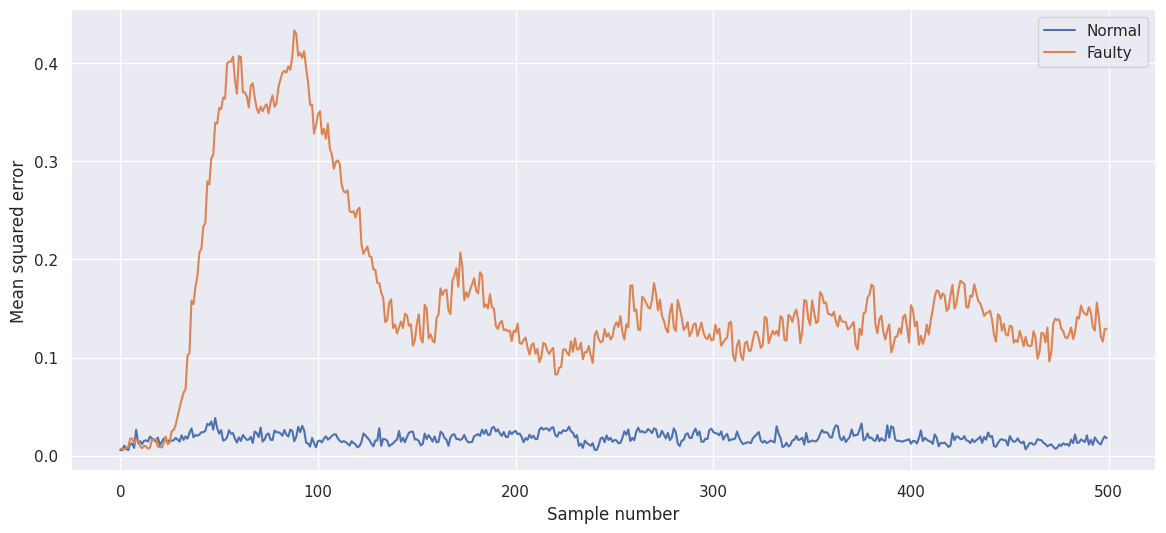

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(get_MSE(normal_sample, normal_predictions_ensemble), label='Normal')
plt.plot(get_MSE(faulty_sample, faulty_predictions_ensemble), label='Faulty')
plt.xlabel('Sample number')
plt.ylabel('Mean squared error')
plt.legend(loc='best')
plt.show()

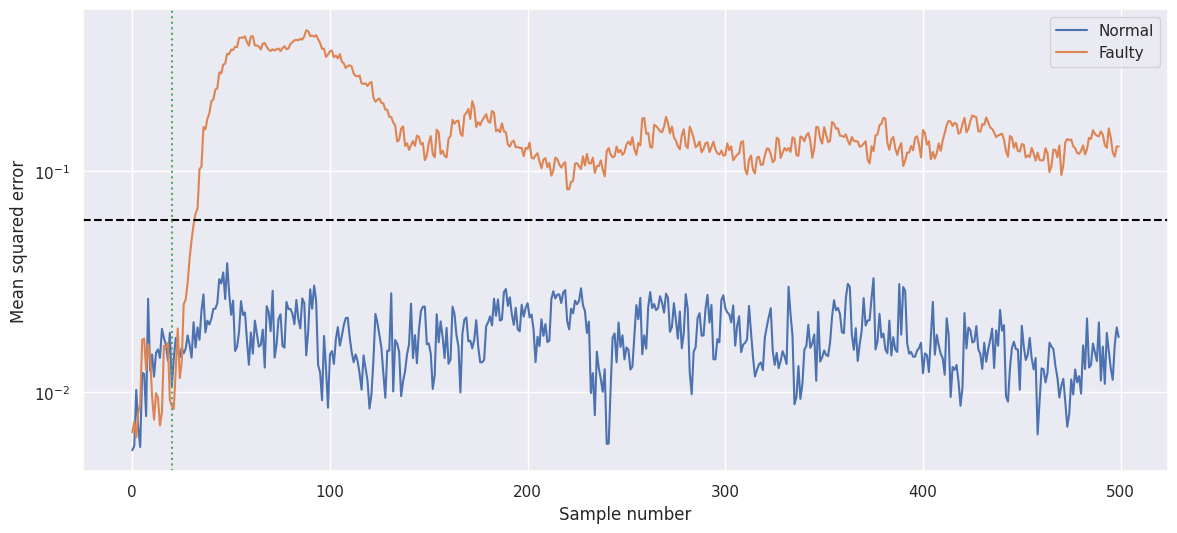

In [ ]:
# try plotting on logarithmic scale

plt.figure(figsize=(14,6))
plt.yscale('log')

plt.plot(get_MSE(normal_sample, normal_predictions_ensemble), label='Normal')
plt.plot(get_MSE(faulty_sample, faulty_predictions_ensemble), label='Faulty')
plt.xlabel('Sample number')
plt.ylabel('Mean squared error')
plt.legend(loc='best')

plt.axhline(y = 6e-2, color='black', linestyle='dashed')
plt.axvline(x = 20, color='g', linestyle = 'dotted') # metric probability

plt.show()


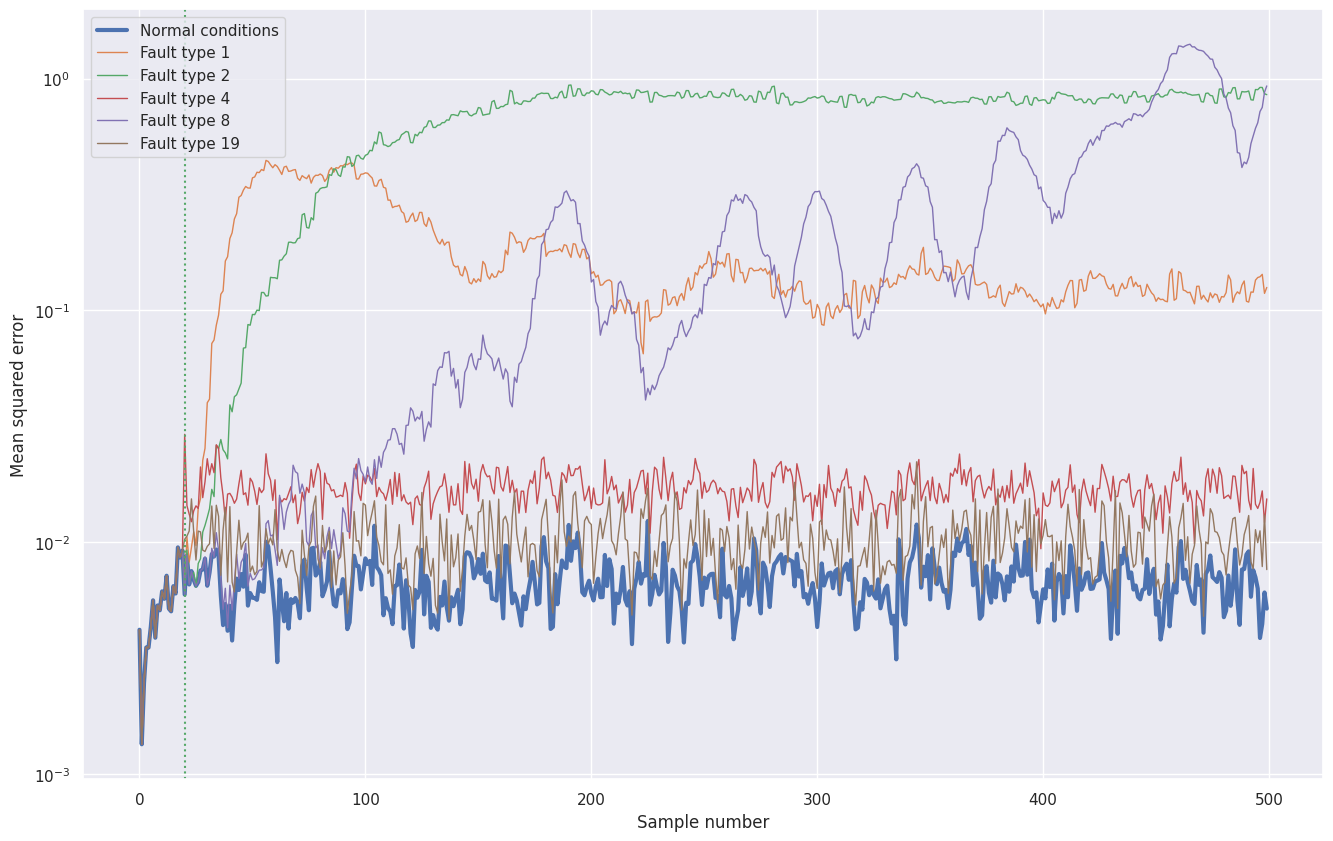

In [ ]:
# plot for different types of faults

plt.figure(figsize=(16,10))
plt.yscale('log')

faults = []

for i in range(1,21):
    faults.append(i)

selected_faults = [0,1,2,4,8,19]

'''
for random_fault in range(5):

    selected_faults.append(faults.pop(np.random.randint(0,len(faults))))
        # choose random_faults
'''

for selected_fault in selected_faults:

    if selected_fault == 0:
        sample_branch = train_df[(train_df.simulationRun==500) & (train_df.faultNumber==selected_fault)].iloc[:,3:]
        label = 'Normal conditions'
        order = 1
        lwt = 3 # lineweight
    else:
        sample_branch = test_df[(test_df.simulationRun==500) & (test_df.faultNumber==selected_fault)].iloc[:,3:]
        label = 'Fault type %d' % selected_fault
        order = 2
        lwt = 1

    sample_branch = pd.DataFrame(scaler.transform(sample_branch), columns = features_df.columns)
    branch_predictions = predict(trained_models_ensemble, sample_branch, features_to_predict)

    plt.plot(get_MSE(sample_branch, branch_predictions), label=label, linewidth = lwt, zorder = order)
    plt.legend(loc='best')

plt.xlabel('Sample number')
plt.ylabel('Mean squared error')
plt.axvline(x = 20, color = 'g', linestyle = 'dotted')

plt.show()